In [1]:
import requests
import pandas as pd


In [2]:
toy_salary_data = "http://data.princeton.edu/wws509/datasets/salary.dat"
sd = requests.get(toy_salary_data).content

In [3]:
sd

b'     sx        rk yr        dg yd    sl\r\n   male      full 25 doctorate 35 36350\r\n   male      full 13 doctorate 22 35350\r\n   male      full 10 doctorate 23 28200\r\n female      full  7 doctorate 27 26775\r\n   male      full 19   masters 30 33696\r\n   male      full 16 doctorate 21 28516\r\n female      full  0   masters 32 24900\r\n   male      full 16 doctorate 18 31909\r\n   male      full 13   masters 30 31850\r\n   male      full 13   masters 31 32850\r\n   male      full 12 doctorate 22 27025\r\n   male associate 15 doctorate 19 24750\r\n   male      full  9 doctorate 17 28200\r\n   male associate  9   masters 27 23712\r\n   male      full  9 doctorate 24 25748\r\n   male      full  7 doctorate 15 29342\r\n   male      full 13 doctorate 20 31114\r\n   male associate 11   masters 14 24742\r\n   male associate 10   masters 15 22906\r\n   male      full  6   masters 21 24450\r\n   male assistant 16   masters 23 19175\r\n   male associate  8   masters 31 20525\r\n   male  

In [4]:
df = pd.DataFrame(toy_salary_data)

ValueError: DataFrame constructor not properly called!

In [9]:
import io
df = pd.read_table(io.StringIO(sd.decode('utf-8')))

In [10]:
df.head()

,sx rk yr dg yd sl
0,male full 25 doctorate 35 36350
1,male full 13 doctorate 22 35350
2,male full 10 doctorate 23 28200
3,female full 7 doctorate 27 26775
4,male full 19 masters 30 33696


In [11]:
df = pd.read_fwf(io.StringIO(sd.decode('utf-8')))

In [12]:
df.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10896a3c8>,
      dtype=object)

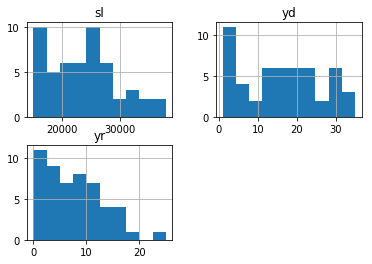

In [15]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108a9bd30>]],
      dtype=object)

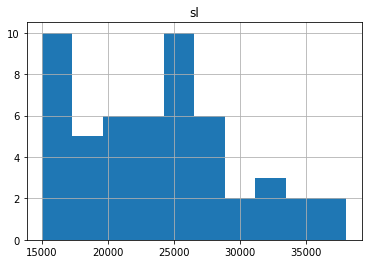

In [16]:
df.hist('sl')

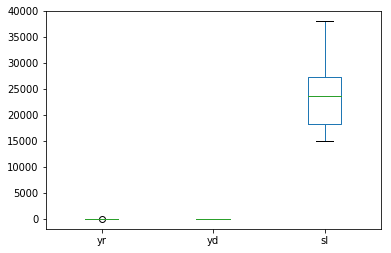

In [17]:
df.plot.box(by="sx")

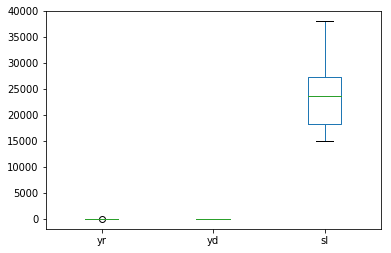

In [18]:
df.plot.box()

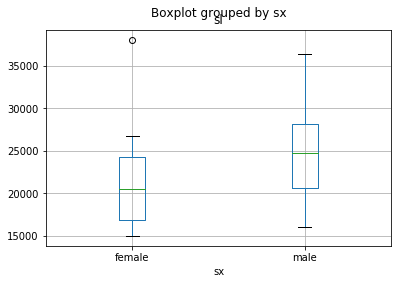

In [19]:
df.boxplot(column="sl", by="sx")

In [20]:
import statsmodels as sm

In [21]:
sm.graphics.beanplot(df)

AttributeError: module 'statsmodels' has no attribute 'graphics'

In [22]:
from statsmodels import graphics as sg

In [24]:
sg.boxplots.beanplot(df)

AttributeError: module 'statsmodels.graphics' has no attribute 'boxplots'

In [25]:
from statsmodels.graphics import boxplots

ValueError: `dataset` input should have multiple elements.

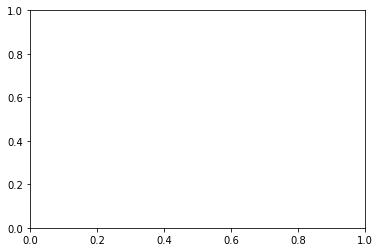

In [27]:
boxplots.beanplot(df)

In [30]:
salaries = [df["sl"][df.sx == "female"], df["sl"][df.sx == "male"]]

In [31]:
salaries

[3     26775
 6     24900
 23    38045
 27    25500
 30    21600
 33    20690
 34    22450
 36    18304
 43    17250
 46    16150
 47    15350
 49    16686
 50    15000
 51    20300
 Name: sl, dtype: int64, 0     36350
 1     35350
 2     28200
 4     33696
 5     28516
 7     31909
 8     31850
 9     32850
 10    27025
 11    24750
 12    28200
 13    23712
 14    25748
 15    29342
 16    31114
 17    24742
 18    22906
 19    24450
 20    19175
 21    20525
 22    27959
 24    24832
 25    25400
 26    24800
 28    26182
 29    23725
 31    23300
 32    23713
 35    20850
 37    17095
 38    16700
 39    17600
 40    18075
 41    18000
 42    20999
 44    16500
 45    16094
 48    16244
 Name: sl, dtype: int64]

In [32]:
len(salaries[0])

14

In [33]:
len(salaries[1])

38

In [34]:
len(df)

52

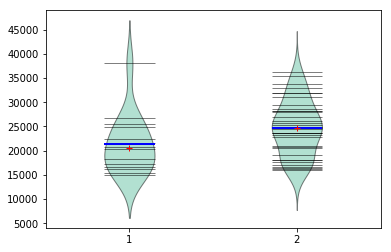

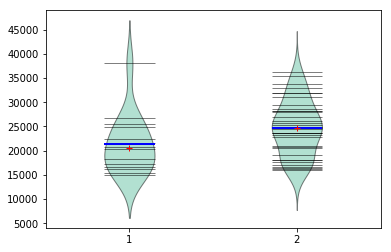

In [35]:
boxplots.beanplot(salaries)

In [36]:
max(salaries[0])

38045

In [37]:
max(salaries[1])

36350

In [38]:
import seaborn as sns

/Users/pauliglot/.local/share/virtualenvs/library_gobbledygook-NjdFyGcL/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


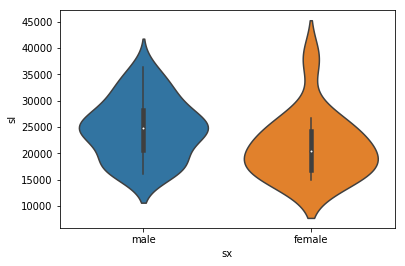

In [39]:
sns.violinplot(x="sx", y="sl", data=df)

In [40]:
!pipenv install CausalInference

Installing CausalInference…
Adding CausalInference to Pipfile's [packages]…
✔ Installation Succeeded 
Pipfile.lock (219e8c) out of date, updating to (b271f3)…
Locking [dev-packages] dependencies…
Locking [packages] dependencies…
✔ Success! 
Updated Pipfile.lock (219e8c)!
Installing dependencies from Pipfile.lock (219e8c)…
  🐍   ▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉ 72/72 — 00:00:23mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm


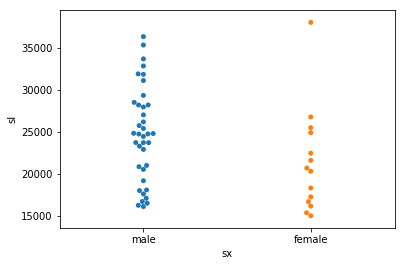

In [42]:
sns.swarmplot(x="sx", y="sl", data=df)

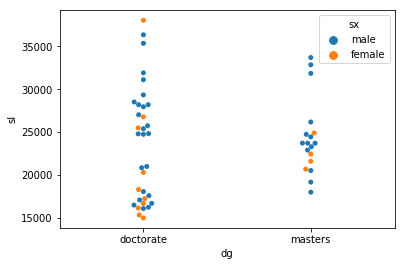

In [44]:
sns.swarmplot(x="dg", y="sl", hue="sx", data=df)

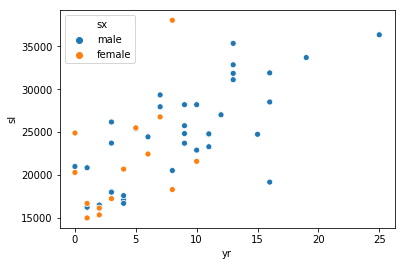

In [45]:
sns.scatterplot(x="yr", y="sl", hue="sx", data=df)

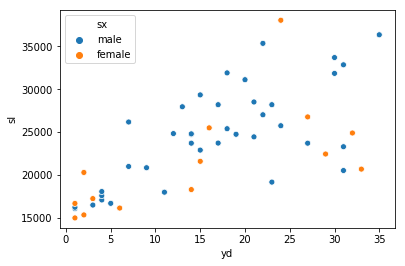

In [46]:
sns.scatterplot(x="yd", y="sl", hue="sx", data=df)

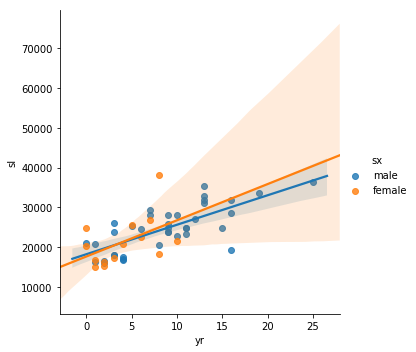

In [47]:
sns.lmplot(x="yr", y="sl", hue="sx", data=df)

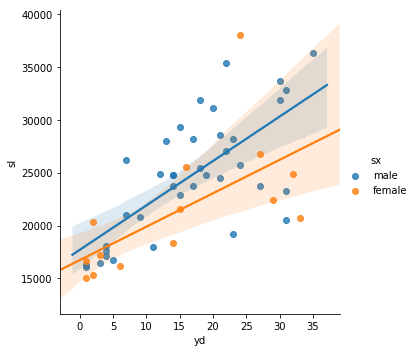

In [48]:
sns.lmplot(x="yd", y="sl", hue="sx", data=df)